# ch 12. MNIST 에 적용

## 1. SoftMAX 를 활용한 MNIST 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import random
tf.set_random_seed(777)  # reproducibility

In [2]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [3]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(X, W) + b

In [4]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [6]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
# Inputing Tensor -------------------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.4f}'.format(avg_cost))

Epoch: 0001 cost = 5.916487252
Epoch: 0002 cost = 1.866405768
Epoch: 0003 cost = 1.162832679
Epoch: 0004 cost = 0.895143161
Epoch: 0005 cost = 0.753446946
Epoch: 0006 cost = 0.665053124
Epoch: 0007 cost = 0.603639526
Epoch: 0008 cost = 0.557631131
Epoch: 0009 cost = 0.523071646
Epoch: 0010 cost = 0.494843250
Epoch: 0011 cost = 0.471451207
Epoch: 0012 cost = 0.451943489
Epoch: 0013 cost = 0.435195638
Epoch: 0014 cost = 0.420587433
Epoch: 0015 cost = 0.408088194


In [9]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9023


In [10]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))

Label:  [4]


In [11]:
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Prediction:  [4]


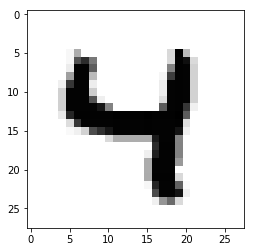

In [23]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [12]:
sess.close()

## 2. NN를 활용한 MNIST

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [14]:
# parameters
tf.set_random_seed(777)
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [15]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [16]:
# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))  
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256])) 
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [17]:
# define cost/loss & optimizer
# tf.nn.softmax_cross_entropy_with_logits() : Cost 함수에 Softmax 를 바로 적용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                      logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [18]:
# initialize --------------------------------------------------------------
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
# Inputing Tensor ----------------------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [20]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 162.538095855
Epoch: 0002 cost = 40.856378926
Epoch: 0003 cost = 25.951241435
Epoch: 0004 cost = 18.033336604
Epoch: 0005 cost = 13.208470125
Epoch: 0006 cost = 9.655478320
Epoch: 0007 cost = 7.271904661
Epoch: 0008 cost = 5.540651633
Epoch: 0009 cost = 4.074460392
Epoch: 0010 cost = 3.097866127
Epoch: 0011 cost = 2.360980675
Epoch: 0012 cost = 1.800317868
Epoch: 0013 cost = 1.347157450
Epoch: 0014 cost = 1.064786895
Epoch: 0015 cost = 0.840181309


In [21]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9448


In [22]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [4]
Prediction:  [4]


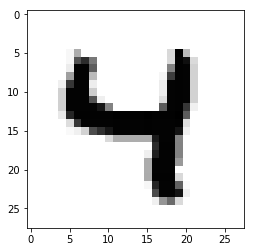

In [23]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [24]:
sess.close()

## 3. weights & bias for NN를 활용한 MNIST (Xavier)
- 초기값을 잘 주어짐으로써 성능을 향상

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [26]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [27]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [28]:
# weights & bias for nn layers (http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow)
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [29]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [30]:
# initialize ----------------------------------------------------------
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [31]:
# Inputing Tensor -------------------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("./data/MNIST_data/", one_hot=True)

Extracting ./data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [32]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.342817177
Epoch: 0002 cost = 0.123277053
Epoch: 0003 cost = 0.080149401
Epoch: 0004 cost = 0.058212431
Epoch: 0005 cost = 0.043214157
Epoch: 0006 cost = 0.034394976
Epoch: 0007 cost = 0.024810856
Epoch: 0008 cost = 0.020439993
Epoch: 0009 cost = 0.017374469
Epoch: 0010 cost = 0.015349797
Epoch: 0011 cost = 0.012645072
Epoch: 0012 cost = 0.010901182
Epoch: 0013 cost = 0.010076454
Epoch: 0014 cost = 0.010257031
Epoch: 0015 cost = 0.006876825


In [33]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.977


In [34]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [6]
Prediction:  [6]


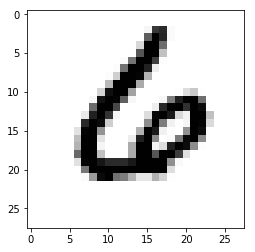

In [35]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [36]:
sess.close()

## 4. More Deep & Drop Out
- 8,9단의 뉴런을 갖는경우, 효율성을 높이기 위해 부분 부분의 실행을 제어

In [ ]:
import tensorflow as tf
import random
tf.set_random_seed(777)  # reproducibility

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

In [ ]:
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

In [ ]:
W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [ ]:
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

In [ ]:
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [ ]:
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

In [ ]:
# 가설의 설립
hypothesis = tf.matmul(L4, W5) + b5

In [ ]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
# initialize -----------------------------------------------------------------
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
# Inputing Tensor ------------------------------------------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

In [ ]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

In [ ]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

In [ ]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
sess.close()

## 5. Adam Optimizer
- Optimize 할 때 추가적인 옵션으로도 성능이 향샹

In [ ]:
# AdamOptimizer() 를 활용 (Gradient Descent 대신 코드를 삽입)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(hypothesis, Y))   # softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## 6. Optimizer
- http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html

<img src="./img/s25RsOr - Imgur.gif" align="left">

<img src="./img/Beal- Imgur.gif" align="left">